<a href="https://www.kaggle.com/code/ahmed3okka/pg-s4-e6-eda-modeling-submission?scriptVersionId=194339038" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_df = pd.read_csv('/kaggle/input/playground-series-s4e6/train.csv')

In [ ]:
train_df.Target.value_counts()

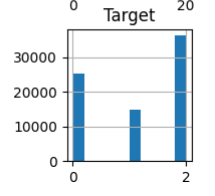

Graduate --> 2

Dropout  --> 0

Enrolled --> 1

In [ ]:
features = ['Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother\'s qualification', 'Father\'s qualification',
       'Mother\'s occupation', 'Father\'s occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP']

col_to_del = ['id']
target = ['Target']

In [ ]:
train_df.head()

In [ ]:
train_df.drop(col_to_del, axis=1,inplace=True)

In [ ]:
train_df.info()

In [ ]:
from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder() 
  
# Encode labels in column 'species'. 
train_df['Target']= label_encoder.fit_transform(train_df['Target']) 
  
train_df['Target'].unique() 

In [ ]:
# train_df['Target'] = [1 if value == 'Graduate' else 0 for value in train_df['Target']]

In [ ]:
train_df.describe().T

In [ ]:
train_df.hist(figsize=(12,15))
plt.show()

In [ ]:
corr = train_df[features].corr()

In [ ]:
plt.figure(figsize=(24,12))
sns.heatmap(corr,annot=True,mask = corr<0.9,cmap='Blues')

In [ ]:
x = train_df.drop(target,axis=1)
y = train_df.Target

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn import metrics

from tqdm.auto import tqdm
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

# def graph_roc(y,y_pred):
#     fpr , tpr , thresholds = metrics.roc_curve(y, y_pred)
#     plt.figure(figsize=(5, 5))
#     plt.plot(fpr, tpr,label='Model')
#     plt.plot([0, 1], [0, 1],label='Random', linestyle='--')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('ROC curve')
#     plt.show()
#     # print(metrics.auc(fpr, tpr))


def met(y,y_pred):
    print('Model Accuracy:',round(metrics.accuracy_score(y,y_pred ),4))
#     print('ROC:',round(metrics.roc_auc_score(y, y_pred),4))
    print((metrics.confusion_matrix(y, y_pred)/metrics.confusion_matrix(y, y_pred).sum()).round(4))

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

In [ ]:
y_pred = rf.predict(x_test)
met(y_test,y_pred)
# graph_roc(y_test,y_pred)

In [ ]:
# n_estimators = [100,150, 200,250, 300,350]
# max_depth =  [10,15,20,25,30,35]
# all_scores =[]
# for m in max_depth:
#     for n in n_estimators:
#         random_rf = RandomForestClassifier(n_estimators=n,max_depth=m,random_state=42,n_jobs=-1)
#         random_rf.fit(x_train, y_train)
#         y_pred_rf = random_rf.predict(x_test)
#         all_scores.append((m,n,metrics.accuracy_score(y_test,y_pred_rf)))

In [ ]:
# df_all_scores = pd.DataFrame(all_scores, columns=['max_depth','n_estimator','acc'])
# df_all_scores.round(4).sort_values(by='acc',ascending=False)

In [ ]:
# acc_pivot = df_all_scores.pivot(index='max_depth', columns=['n_estimator'],values=['acc'])
# acc_pivot.round(4)
# plt.figure(figsize = (16,5))
# sns.heatmap(acc_pivot,annot=True,fmt='.3f')

In [ ]:
rf = RandomForestClassifier(n_estimators=250,max_depth=30,random_state=42,n_jobs=-1)
rf.fit(x_train, y_train)

In [ ]:
rf_pred = rf.predict(x_test)
print(metrics.accuracy_score(y_test,rf_pred))

In [ ]:
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances.sort_values(by='Importance', ascending=False)

# Submission

In [ ]:
test_df = pd.read_csv('/kaggle/input/playground-series-s4e6/test.csv')
submission = pd.read_csv('/kaggle/input/playground-series-s4e6/sample_submission.csv')

test_df.drop(col_to_del, axis=1,inplace=True)

In [ ]:
# Predict probabilities for the test dataset using the trained XGBoost model
y_test = rf.predict(test_df)

In [ ]:
# Update the 'smoking' column in the submission DataFrame with predicted values
submission['Target'] = y_test
submission['Target'] = label_encoder.inverse_transform(submission['Target'])
# Save the submission file without index to a CSV
submission.to_csv('submission.csv', index=False)